In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

df_fig2e = pd.read_excel("./source_data/41592_2023_2148_MOESM5_ESM.xlsx", sheet_name="Fig2e", index_col=0)
df_fig2e.head(2)

,natural,GCVAE,RfamGen
rfam,,,
RF00001,15.2950,8.8355,16.1825
RF00002,15.5515,8.3490,5.7000


In [5]:
from scipy.stats import mannwhitneyu

mannwhitneyu(
    df_fig2e["RfamGen"] - df_fig2e["natural"],
    df_fig2e["GCVAE"] - df_fig2e["natural"],
    alternative="greater"
)

MannwhitneyuResult(statistic=271295.0, pvalue=4.704927769535039e-31)

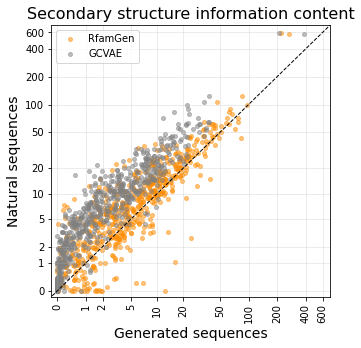

In [7]:
import numpy as np

color_gcvae = "gray"    
color_cmvae = "darkorange"
alpha = 0.5
xmin = -0.2
xmax = 9.5
size = 16
ticks = [0, 1, 2, 5, 10, 20, 50, 100] + [200*i for i in range(1, 8)]

fig, ax1 = plt.subplots(figsize = (5, 5))
ax1.plot([-100, 100], [-100, 100], color = "black", linestyle = "dashed", linewidth =1)
ax1.scatter(
    np.log2(df_fig2e["RfamGen"]+1),
    np.log2(df_fig2e["natural"]+1),
    alpha = alpha, label ="RfamGen", s = size, color = color_cmvae)
ax1.scatter(
    np.log2(df_fig2e["GCVAE"]+1),
    np.log2(df_fig2e["natural"]+1), 
    alpha = alpha, label = "GCVAE", s = size, color = color_gcvae)

plt.xticks([np.log2(t+1) for t in ticks], ticks, rotation=90)
plt.yticks([np.log2(t+1) for t in ticks], ticks)
plt.title("Secondary structure information content", fontsize = 16)
plt.xlabel("Generated sequences", fontsize = 14)
plt.ylabel("Natural sequences", fontsize = 14)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(xmin, xmax)
ax1.legend()
ax1.grid(alpha = 0.3)
# plt.savefig(f"./figure2e.pdf", transparent = True)